#### The `langdetect` and `langid` Libraries

####  `langdetect`

[`langdetect`](https://pypi.org/project/langdetect/) supports 55 languages out of the box ([ISO 639-1 codes](https://www.wikiwand.com/en/List_of_ISO_639-1_codes)):

> af, ar, bg, bn, ca, cs, cy, da, de, el, en, es, et, fa, fi, fr, gu, he,
hi, hr, hu, id, it, ja, kn, ko, lt, lv, mk, ml, mr, ne, nl, no, pa, pl,
pt, ro, ru, sk, sl, so, sq, sv, sw, ta, te, th, tl, tr, uk, ur, vi, zh-cn, zh-tw

In [2]:
#import
from langdetect import detect
from langdetect import detect_langs

In [3]:
detect("You are a noob.")

'so'

In [4]:
detect("Eisai enas ilithios re.")

'lt'

In [5]:
detect("Είσαι")

'el'

In [6]:
detect_langs("What's up man?")

[en:0.7142816943076757, id:0.28571612486335973]

#### `langid`

[`langid`](https://github.com/saffsd/langid.py) comes pre-trained on 97 languages (ISO 639-1 codes given):

af, am, an, ar, as, az, be, bg, bn, br, bs, ca, cs, cy, da, de, dz, el, en, eo, es, et, eu, fa, fi, fo, fr, ga, gl, gu, he, hi, hr, ht, hu, hy, id, is, it, ja, jv, ka, kk, km, kn, ko, ku, ky, la, lb, lo, lt, lv, mg, mk, ml, mn, mr, ms, mt, nb, ne, nl, nn, no, oc, or, pa, pl, ps, pt, qu, ro, ru, rw, se, si, sk, sl, sq, sr, sv, sw, ta, te, th, tl, tr, ug, uk, ur, vi, vo, wa, xh, zh, zu

In [19]:
from langid import langid

In [20]:
langid.classify("You are a noob.")[0]

'en'

In [21]:
langid.classify("Eisai enas ilithios re.")[0]

'lt'

In [22]:
langid.classify("What's up man?")

('en', -25.157379627227783)

In [29]:
from langid.langid import LanguageIdentifier, model
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)
identifier.classify("What's up man?")

('en', 0.9999887931088783)

In [30]:
langid.identifier.set_languages(['de','fr','it'])
langid.identifier.classify("What's up man?")

('de', -39.938232421875)

#### Word2Vec

In [31]:
from nltk.corpus import gutenberg
gutenberg.readme().replace('\n', ' ')

'Project Gutenberg Selections http://gutenberg.net/  This corpus contains etexts from from Project Gutenberg, by the following authors:  * Jane Austen (3) * William Blake (2) * Thornton W. Burgess * Sarah Cone Bryant * Lewis Carroll * G. K. Chesterton (3) * Maria Edgeworth * King James Bible * Herman Melville * John Milton * William Shakespeare (3) * Walt Whitman  The beginning of the body of each book could not be identified automatically, so the semi-generic header of each file has been removed, and included below. Some source files ended with a line "End of The Project Gutenberg Etext...", and this has been deleted.  Information about Project Gutenberg (one page)  We produce about two million dollars for each hour we work.  The fifty hours is one conservative estimate for how long it we take to get any etext selected, entered, proofread, edited, copyright searched and analyzed, the copyright letters written, etc.  This projected audience is one hundred million readers.  If our value

In [32]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [33]:
bible_kjv_sents = gutenberg.sents('bible-kjv.txt')
len(bible_kjv_sents)

30103

#### Implementing Word2Vec

In [34]:
from string import punctuation

discard_punctuation_and_lowercased_sents = [[word.lower() for word in sent if word not in punctuation and word.isalpha()] 
                                            for sent in bible_kjv_sents]
discard_punctuation_and_lowercased_sents[3]

['in',
 'the',
 'beginning',
 'god',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth']

In [37]:
from gensim.models import Word2Vec

bible_kjv_word2vec_model = Word2Vec(discard_punctuation_and_lowercased_sents, min_count=5, size=200)
bible_kjv_word2vec_model.save('bible_word2vec_gensim')
# model = Word2Vec.load(fname) # To load a model
word_vectors = bible_kjv_word2vec_model.wv
del bible_kjv_word2vec_model # When we finish training the model, we can only delete it and keep the word vectors.
word_vectors.save_word2vec_format('bible_word2vec_org', 'bible_word2vec_vocabulary')
len(word_vectors.vocab)

5279

In [38]:
word_vectors.most_similar(['god']) # Most similar as in closest in the word graph. Word2vec is essentially about proportions of word occurrences in relations holding in general over large corpora of text. Consider word analogy ‘man is to woman as king is to X’ which was famously demonstrated in word2vec. The algorithm is able to come up with an answer queen, almost magically by simple vector differences. The main idea, called distributional hypothesis, is that similar words appear in similar contexts of words around them.

[('lord', 0.7784607410430908),
 ('truth', 0.7335808277130127),
 ('spirit', 0.7329315543174744),
 ('glory', 0.7322947978973389),
 ('salvation', 0.7318679094314575),
 ('faith', 0.7294133901596069),
 ('hosts', 0.72527015209198),
 ('gospel', 0.7025399804115295),
 ('christ', 0.6934913396835327),
 ('mercy', 0.6844473481178284)]

In [39]:
word_vectors.most_similar(['heaven'], topn=3)

[('earth', 0.745545506477356),
 ('heavens', 0.7376387715339661),
 ('mountains', 0.6927394866943359)]

In [40]:
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.6369451284408569)]

In [41]:
# The `_cosmul` variant uses a slightly-different comparison when using multiple positive/negative examples (such as when asking about analogies). One paper has shown it does better:
word_vectors.most_similar_cosmul(positive=['woman', 'king'], negative=['man'], topn=1)

[('queen', 0.9865918159484863)]

In [42]:
word_vectors.similarity('lord', 'god')

0.77846074

In [43]:
word_vectors.doesnt_match("lord god salvation food spirit".split())

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'food'

#### Another example

In [53]:
# Install gensim - pip install gensim
import nltk
import urllib
import bs4 as bs
import re
from gensim.models import Word2Vec
from nltk.corpus import stopwords

# Gettings the data source
source = urllib.request.urlopen('https://en.wikipedia.org/wiki/Global_warming').read()

# Parsing the data/ creating BeautifulSoup object
soup = bs.BeautifulSoup(source,'lxml')

# Fetching the data
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

# Preprocessing the data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\W',' ',text)
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [54]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)

sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

In [55]:
# # Training the Word2Vec model
# model = Word2Vec(sentences, min_count=1)

# words = model.wv.vocab

In [56]:
# # Finding Word Vectors
# vector = model.wv['global']

# # Most similar words
# similar = model.wv.most_similar('warming')

In [57]:
for i in range(len(sentences)):
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]
    
    
# Training the Word2Vec model
model = Word2Vec(sentences, min_count=1)

words = model.wv.vocab

# Finding Word Vectors
vector = model.wv['global']

# Most similar words
similar = model.wv.most_similar('global')

In [58]:
# # Install gensim - pip install gensim
# from gensim.models import KeyedVectors

# filename = 'GoogleNews-vectors-negative300.bin'

# model = KeyedVectors.load_word2vec_format(filename, binary=True)

# model.wv.most_similar('king')

# model.wv.most_similar(positive=['king','woman'], negative= ['man'])

#### Word2vec from Scratch with NumPy

In [66]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm_notebook
import re

In [67]:
#Data Preparation

def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[tokens[i]])
            Y.append(word_to_id[tokens[j]])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)
            
    return X, Y

In [68]:
doc = "After the deduction of the costs of investing, " \
      "beating the stock market is a loser's game."
tokens = tokenize(doc)
word_to_id, id_to_word = mapping(tokens)
X, Y = generate_training_data(tokens, word_to_id, 3)
vocab_size = len(id_to_word)
m = Y.shape[1]
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1

In [69]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

In [70]:
# Forward Propagation
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z

def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == Z.shape)

    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

In [71]:
#cost function
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

In [72]:
#Backward propagation
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']

In [73]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]

            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

Cost after epoch 0: 2.552083608453316
Cost after epoch 10: 2.5518306130784434
Cost after epoch 20: 2.5515632554518595
Cost after epoch 30: 2.551264041967188
Cost after epoch 40: 2.550915048022628
Cost after epoch 50: 2.5504968480420236
Cost after epoch 60: 2.5499979894971774
Cost after epoch 70: 2.5493900805846765
Cost after epoch 80: 2.548646292722973
Cost after epoch 90: 2.5477369244063857
Cost after epoch 100: 2.546627772539722
Cost after epoch 110: 2.5453059252950707
Cost after epoch 120: 2.5437138973935265
Cost after epoch 130: 2.5418002792651935
Cost after epoch 140: 2.5395092921453215
Cost after epoch 150: 2.5367779449998356
Cost after epoch 160: 2.53359903052112
Cost after epoch 170: 2.5298627786646684
Cost after epoch 180: 2.5254852650298827
Cost after epoch 190: 2.520385103542658
Cost after epoch 200: 2.514480735181132
Cost after epoch 210: 2.5078252081366013
Cost after epoch 220: 2.5002739365719373
Cost after epoch 230: 2.4917707080938416
Cost after epoch 240: 2.482299700399

Cost after epoch 2020: 2.0410531334272948
Cost after epoch 2030: 2.041078363913082
Cost after epoch 2040: 2.0411033151529243
Cost after epoch 2050: 2.041127994304777
Cost after epoch 2060: 2.0411520290299894
Cost after epoch 2070: 2.0411757688090604
Cost after epoch 2080: 2.0411992566288806
Cost after epoch 2090: 2.041222493002015
Cost after epoch 2100: 2.0412454779325944
Cost after epoch 2110: 2.041267860715978
Cost after epoch 2120: 2.041289960461876
Cost after epoch 2130: 2.041311812538795
Cost after epoch 2140: 2.0413334136525676
Cost after epoch 2150: 2.041354760714693
Cost after epoch 2160: 2.0413755281970296
Cost after epoch 2170: 2.0413960095014487
Cost after epoch 2180: 2.0414162359062233
Cost after epoch 2190: 2.041436203587472
Cost after epoch 2200: 2.0414559094449904
Cost after epoch 2210: 2.041475056190731
Cost after epoch 2220: 2.0414939138774706
Cost after epoch 2230: 2.0415125119230613
Cost after epoch 2240: 2.041530847979012
Cost after epoch 2250: 2.04154892067848
Cost

Cost after epoch 4000: 2.0368999209347116
Cost after epoch 4010: 2.036837037876991
Cost after epoch 4020: 2.036774189540339
Cost after epoch 4030: 2.0367112538049135
Cost after epoch 4040: 2.0366482382039353
Cost after epoch 4050: 2.03658515032289
Cost after epoch 4060: 2.0365231484869586
Cost after epoch 4070: 2.036461219399717
Cost after epoch 4080: 2.036399242146197
Cost after epoch 4090: 2.0363372236343937
Cost after epoch 4100: 2.036275170811452
Cost after epoch 4110: 2.036214221214284
Cost after epoch 4120: 2.0361533774240264
Cost after epoch 4130: 2.036092520081897
Cost after epoch 4140: 2.036031655474123
Cost after epoch 4150: 2.0359707899159534
Cost after epoch 4160: 2.035911037565789
Cost after epoch 4170: 2.0358514193778086
Cost after epoch 4180: 2.0357918178597565
Cost after epoch 4190: 2.0357322386912
Cost after epoch 4200: 2.0356726875730726
Cost after epoch 4210: 2.035614253148805
Cost after epoch 4220: 2.0355559768469362
Cost after epoch 4230: 2.035497743311522
Cost aft

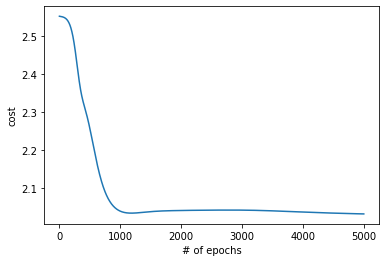

In [74]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 50, 0.05, 5000, batch_size=128, parameters=None, print_cost=True)

In [75]:
#Evaluate
X_test = np.arange(vocab_size)
X_test = np.expand_dims(X_test, axis=0)
softmax_test, _ = forward_propagation(X_test, paras)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

In [76]:
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))

stock's neighbor words: ['investing', 'a', 'is', 'beating']
game's neighbor words: ['is', "loser's", 'a', 'beating']
beating's neighbor words: ['market', 'stock', 'investing', 'costs']
costs's neighbor words: ['beating', 'of', 'deduction', 'the']
deduction's neighbor words: ['costs', 'after', 'the', 'beating']
investing's neighbor words: ['the', 'stock', 'beating', 'of']
market's neighbor words: ['is', "loser's", 'a', 'beating']
after's neighbor words: ['of', 'the', 'deduction', 'costs']
a's neighbor words: ['game', 'market', "loser's", 'a']
the's neighbor words: ['is', 'of', 'beating', 'stock']
of's neighbor words: ['the', 'of', 'costs', 'beating']
is's neighbor words: ['game', 'market', "loser's", 'a']
loser's's neighbor words: ['game', 'market', "loser's", 'stock']


#### Another example

In [77]:
# Author: Robert Guthrie

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [78]:
word_to_ix = {"hello": 0, "world": 1}
embeds = nn.Embedding(2, 5)  # 2 words in vocab, 5 dimensional embeddings
lookup_tensor = torch.tensor([word_to_ix["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)

tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519]],
       grad_fn=<EmbeddingBackward>)


In [79]:
#N-Gram Language Modeling
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in tensors)
        context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long)

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_idxs)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a tensor)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]], dtype=torch.long))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        # Get the Python number from a 1-element Tensor by calling tensor.item()
        total_loss += loss.item()
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]
[518.3657183647156, 515.8615536689758, 513.3740382194519, 510.9024748802185, 508.4454679489136, 506.00162506103516, 503.5684814453125, 501.14673233032227, 498.7354040145874, 496.3341040611267]


In [80]:
#Computing Word Embeddings: Continuous Bag-of-Words
CONTEXT_SIZE = 2  # 2 words to the left, 2 to the right
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])


class CBOW(nn.Module):

    def __init__(self):
        pass

    def forward(self, inputs):
        pass

# create your model and train.  here are some functions to help you make
# the data ready for use by your module


def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)


make_context_vector(data[0][0], word_to_ix)  # example

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


tensor([17,  8, 29, 45])

#### Another example of word Embedding using Gensim

In [81]:
import re
import numpy as np

from gensim.models import Word2Vec
from nltk.corpus import gutenberg
from multiprocessing import Pool
from scipy import spatial

In [82]:
#import training dataset
sentences = list(gutenberg.sents('shakespeare-hamlet.txt'))   # import the corpus and convert into a list

In [83]:
print('Type of corpus: ', type(sentences))
print('Length of corpus: ', len(sentences))

Type of corpus:  <class 'list'>
Length of corpus:  3106


In [84]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['[', 'The', 'Tragedie', 'of', 'Hamlet', 'by', 'William', 'Shakespeare', '1599', ']']
['Actus', 'Primus', '.']
['Fran', '.']


In [85]:
#Preprocess data
for i in range(len(sentences)):
    sentences[i] = [word.lower() for word in sentences[i] if re.match('^[a-zA-Z]+', word)]

In [86]:
print(sentences[0])    # title, author, and year
print(sentences[1])
print(sentences[10])

['the', 'tragedie', 'of', 'hamlet', 'by', 'william', 'shakespeare']
['actus', 'primus']
['fran']


In [87]:
model = Word2Vec(sentences = sentences, size = 100, sg = 1, window = 3, min_count = 1, iter = 10, workers = Pool()._processes)

In [88]:
model.init_sims(replace = True)

In [89]:
#Save and load model
model.save('word2vec_model')
model = Word2Vec.load('word2vec_model')
#Similarity calculation
model.most_similar('hamlet')

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


[('horatio', 0.9972403645515442),
 ('laertes', 0.9968450665473938),
 ('looke', 0.9967054128646851),
 ('how', 0.9966220259666443),
 ('meane', 0.9963749647140503),
 ('does', 0.9961333274841309),
 ('mother', 0.9960773587226868),
 ('much', 0.996006965637207),
 ('newes', 0.9959443807601929),
 ('heere', 0.9959315061569214)]

In [90]:
v1 = model['king']
v2 = model['queen']

C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [91]:
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)

In [92]:
cosine_similarity(v1, v2)

0.9957135915756226

#### Another example of word embedding

In [93]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

Using TensorFlow backend.
W0529 13:45:30.007943 22736 __init__.py:329] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


In [94]:
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

In [95]:
sentiments = array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [96]:
from nltk.tokenize import word_tokenize

all_words = []
for sent in corpus:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)

In [97]:
unique_words = set(all_words)
print(len(unique_words))

45


In [99]:
embedded_sentences = [one_hot(sent, 50) for sent in corpus]
print(embedded_sentences )

[[36, 5, 27, 46, 7], [36, 19, 33, 34, 13, 31, 12], [39, 30, 8, 12, 5, 4], [37, 23], [45, 36, 21, 41, 13, 31, 12], [47, 4, 34, 13], [19, 34, 19, 4, 42, 7], [12, 5, 4, 18, 7], [16, 19], [17, 5, 41], [4, 36], [12, 33, 36, 27], [13, 47, 9, 31, 36, 7], [36, 7, 33, 16], [13, 47, 9, 23], [36, 19, 5, 4]]


In [100]:
word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

In [101]:
padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')
print(padded_sentences)

[[36  5 27 46  7  0  0]
 [36 19 33 34 13 31 12]
 [39 30  8 12  5  4  0]
 [37 23  0  0  0  0  0]
 [45 36 21 41 13 31 12]
 [47  4 34 13  0  0  0]
 [19 34 19  4 42  7  0]
 [12  5  4 18  7  0  0]
 [16 19  0  0  0  0  0]
 [17  5 41  0  0  0  0]
 [ 4 36  0  0  0  0  0]
 [12 33 36 27  0  0  0]
 [13 47  9 31 36  7  0]
 [36  7 33 16  0  0  0]
 [13 47  9 23  0  0  0]
 [36 19  5  4  0  0  0]]


In [103]:
model = Sequential()
model.add(Embedding(50, 20, input_length=length_long_sentence))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

W0529 14:07:02.279598 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0529 14:07:02.333444 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [104]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

W0529 14:07:38.852829 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0529 14:07:38.875306 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

W0529 14:07:38.879295 22736 deprecation.py:323] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 7, 20)             1000      
_________________________________________________________________
flatten_1 (Flatten)          (None, 140)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 141       
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________
None


In [105]:
model.fit(padded_sentences, sentiments, epochs=100, verbose=1)

W0529 14:07:59.795648 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0529 14:07:59.872444 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

W0529 14:07:59.907349 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:3005: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0529 14:07:59.909344 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0529 14:07:59.910341 22736 module_wrapper.py:139

Epoch 1/100


W0529 14:08:04.958337 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:207: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0529 14:08:04.958337 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:216: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W0529 14:08:05.681451 22736 module_wrapper.py:139] From C:\Users\Kunal\Anaconda3\envs\gputest\lib\site-packages\keras\backend\tensorflow_backend.py:223: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



16/16 [==============================] - 7s 419ms/step - loss: 0.6982 - acc: 0.3750
Epoch 2/100
16/16 [==============================] - 0s 312us/step - loss: 0.6949 - acc: 0.5000
Epoch 3/100
16/16 [==============================] - 0s 249us/step - loss: 0.6916 - acc: 0.5625
Epoch 4/100
16/16 [==============================] - 0s 312us/step - loss: 0.6884 - acc: 0.6250
Epoch 5/100
16/16 [==============================] - 0s 312us/step - loss: 0.6851 - acc: 0.8750
Epoch 6/100
16/16 [==============================] - 0s 312us/step - loss: 0.6819 - acc: 0.8750
Epoch 7/100
16/16 [==============================] - 0s 249us/step - loss: 0.6786 - acc: 0.8750
Epoch 8/100
16/16 [==============================] - 0s 249us/step - loss: 0.6754 - acc: 0.8750
Epoch 9/100
16/16 [==============================] - 0s 249us/step - loss: 0.6722 - acc: 0.8750
Epoch 10/100
16/16 [==============================] - 0s 187us/step - loss: 0.6689 - acc: 0.8750
Epoch 11/100
16/16 [==============================]

Epoch 86/100
16/16 [==============================] - 0s 249us/step - loss: 0.3717 - acc: 1.0000
Epoch 87/100
16/16 [==============================] - 0s 187us/step - loss: 0.3675 - acc: 1.0000
Epoch 88/100
16/16 [==============================] - 0s 248us/step - loss: 0.3634 - acc: 1.0000
Epoch 89/100
16/16 [==============================] - 0s 249us/step - loss: 0.3594 - acc: 1.0000
Epoch 90/100
16/16 [==============================] - 0s 187us/step - loss: 0.3553 - acc: 1.0000
Epoch 91/100
16/16 [==============================] - 0s 249us/step - loss: 0.3513 - acc: 1.0000
Epoch 92/100
16/16 [==============================] - 0s 187us/step - loss: 0.3473 - acc: 1.0000
Epoch 93/100
16/16 [==============================] - 0s 249us/step - loss: 0.3433 - acc: 1.0000
Epoch 94/100
16/16 [==============================] - 0s 249us/step - loss: 0.3393 - acc: 1.0000
Epoch 95/100
16/16 [==============================] - 0s 249us/step - loss: 0.3354 - acc: 1.0000
Epoch 96/100
16/16 [==========

In [106]:
loss, accuracy = model.evaluate(padded_sentences, sentiments, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 100.000000


#### Sentence-embedding

In [125]:
from gensim.models import FastText
sentences = [["cat", "say", "meow"], ["dog", "say", "woof"]]
ft = FastText(sentences, min_count=1, size=10)

from fse.models import Average
from fse import IndexedList
model = Average(ft)
model.train(IndexedList(sentences))

model.sv.similarity(0,1)

W0529 17:30:00.769880 22736 base_any2vec.py:723] consider setting layer size to a multiple of 4 for greater performance
W0529 17:30:01.599758 22736 base_any2vec.py:1386] under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
D:\programming python\python_script\NLP\Natural_Language_processing_examples\Basic_NLP\fse\models\base_s2v.py:172: UserWarning: C extension not loaded, training/inferring will be slow. Install a C compiler and reinstall fse.
  "C extension not loaded, training/inferring will be slow. "


0.4804146